In [25]:
# 6. Split data
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, 'is_default')


--- Data Splitting ---
Training set: 135642 samples (13.49% default rate)
Validation set: 45214 samples (13.49% default rate)
Test set: 45214 samples (13.49% default rate)


In [26]:
# 7. Build model
model, train_auc, val_auc = build_logistic_model(X_train, y_train, X_val, y_val, selected_features)


--- Logistic Regression Model ---
Training AUC: 0.9677
Validation AUC: 0.9672
Gini Coefficient (Train): 0.9354
Gini Coefficient (Validation): 0.9343

Feature Coefficients:
                 Feature  Coefficient
14  acc_open_past_24mths     0.037565
9        fico_range_high     0.016958
10        fico_range_low     0.009415
12              all_util     0.008480
13           open_rv_24m     0.007457
6               int_rate     0.002821
5          out_prncp_inv     0.002605
7            total_pymnt     0.000638
11        bc_open_to_buy     0.000014
8        total_pymnt_inv    -0.000115
2        last_pymnt_amnt    -0.000606
3        total_rec_prncp    -0.000756
4              out_prncp    -0.002764
1   last_fico_range_high    -0.010364
0    last_fico_range_low    -0.017905


In [29]:
# 8. Create scorecard
scorecard, factor, offset = convert_to_scorecard(model, selected_features)


--- Scorecard Conversion ---
Factor: 28.85
Offset: 487.12

Scorecard Points:
                 Feature  Coefficient      Points
0              Intercept     0.001886  487.068463
1    last_fico_range_low    -0.017905    0.516636
2   last_fico_range_high    -0.010364    0.299044
3        last_pymnt_amnt    -0.000606    0.017495
4        total_rec_prncp    -0.000756    0.021828
5              out_prncp    -0.002764    0.079758
6          out_prncp_inv     0.002605   -0.075160
7               int_rate     0.002821   -0.081396
8            total_pymnt     0.000638   -0.018400
9        total_pymnt_inv    -0.000115    0.003323
10       fico_range_high     0.016958   -0.489298
11        fico_range_low     0.009415   -0.271645
12        bc_open_to_buy     0.000014   -0.000390
13              all_util     0.008480   -0.244690
14           open_rv_24m     0.007457   -0.215172
15  acc_open_past_24mths     0.037565   -1.083909


In [30]:
# 9. Calculate scores
test_scores = calculate_scores(X_test[selected_features], model, factor, offset)


MODEL PERFORMANCE EVALUATION

AUC (Area Under Curve): 0.9686
Gini Coefficient: 0.9372
KS Statistic: 0.8383


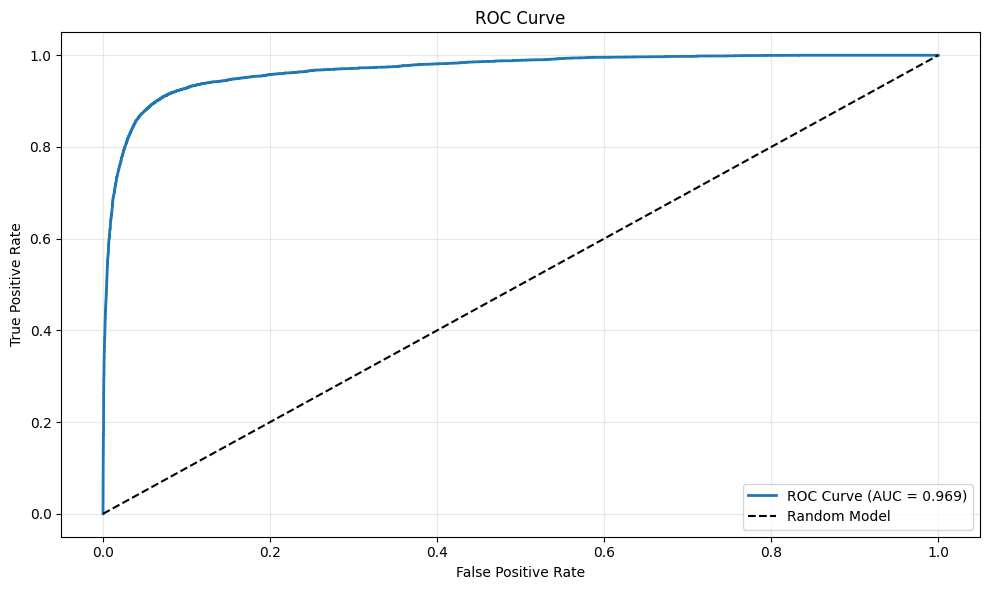

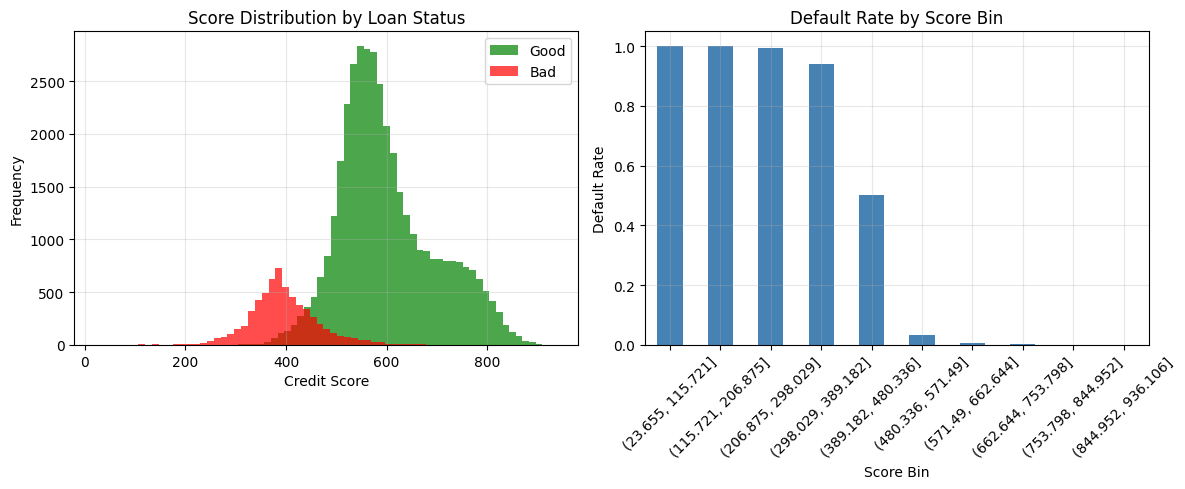

In [31]:
# 10. Evaluate performance
y_test_proba = model.predict_proba(X_test[selected_features])[:, 1]
auc, gini, ks = evaluate_model_performance(y_test, y_test_proba, test_scores)

In [32]:
# 11. Calculate PSI
train_scores = calculate_scores(X_train[selected_features], model, factor, offset)
psi = calculate_psi(train_scores, test_scores)


Population Stability Index (PSI): 0.0003
Interpretation: Population is STABLE


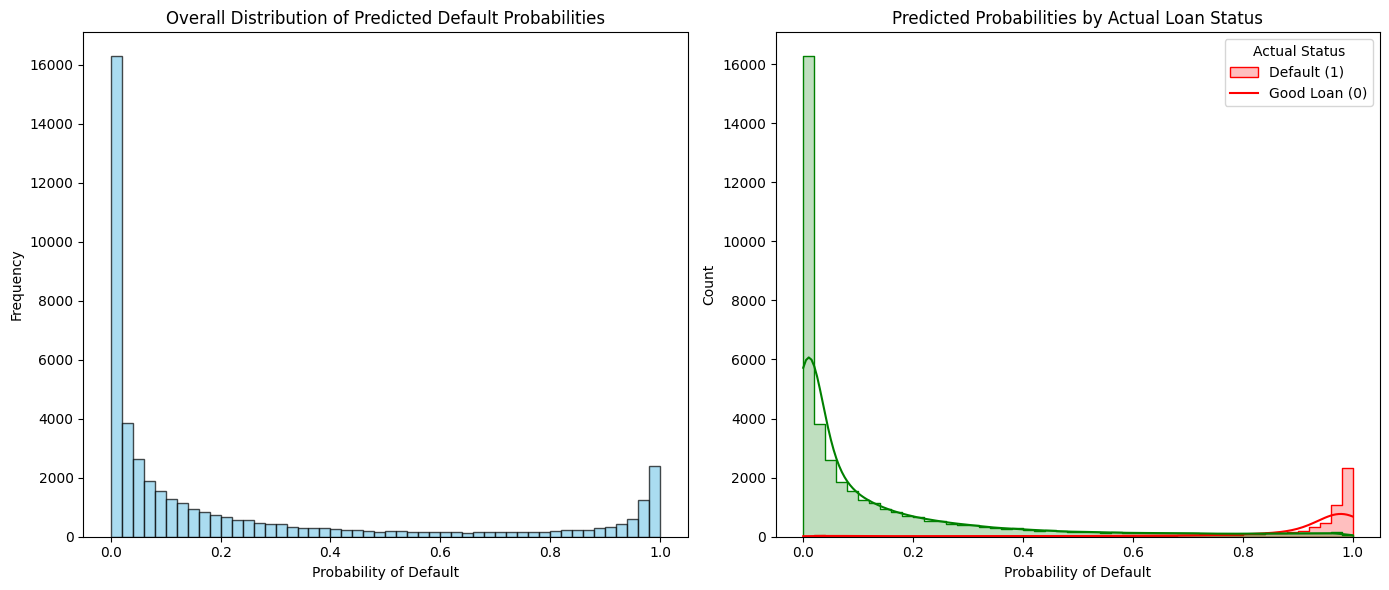


--- Summary Statistics of Predicted Default Probabilities ---
count    4.521400e+04
mean     2.308132e-01
std      3.293298e-01
min      1.746366e-07
25%      5.126761e-03
50%      5.857402e-02
75%      3.026848e-01
max      9.999999e-01
dtype: float64

--- Sample Predictions (Random 10) ---
      Actual_Label  Predicted_Probability_of_Default
25145    Good Loan                          0.000007
35138      Default                          0.993176
6171       Default                          0.707078
23141    Good Loan                          0.056375
6493     Good Loan                          0.013389
36287    Good Loan                          0.130227
20481    Good Loan                          0.039672
43899    Good Loan                          0.101150
32553    Good Loan                          0.043008
25106    Good Loan                          0.037754


In [33]:
# Plotting the distribution of predicted probabilities
plt.figure(figsize=(14, 6))

# Subplot 1: Overall distribution
plt.subplot(1, 2, 1)
plt.hist(y_test_proba, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Overall Distribution of Predicted Default Probabilities')
plt.xlabel('Probability of Default')
plt.ylabel('Frequency')

# Subplot 2: Distribution by Actual Class
plt.subplot(1, 2, 2)
# Create a temporary dataframe for plotting
plot_df = pd.DataFrame({'Probability': y_test_proba, 'Actual': y_test.values})
sns.histplot(data=plot_df, x='Probability', hue='Actual', bins=50, kde=True,
             palette={0: 'green', 1: 'red'}, element="step", common_norm=False)
plt.title('Predicted Probabilities by Actual Loan Status')
plt.xlabel('Probability of Default')
plt.legend(title='Actual Status', labels=['Default (1)', 'Good Loan (0)'])

plt.tight_layout()
plt.show()

# Printing summary statistics
print("\n--- Summary Statistics of Predicted Default Probabilities ---")
prob_series = pd.Series(y_test_proba)
print(prob_series.describe())

# Displaying some examples
print("\n--- Sample Predictions (Random 10) ---")
example_df = pd.DataFrame({
    'Actual_Status': y_test.values,
    'Predicted_Probability_of_Default': y_test_proba
})

# Map 0/1 to readable labels for display
example_df['Actual_Label'] = example_df['Actual_Status'].map({0: 'Good Loan', 1: 'Default'})

print(example_df[['Actual_Label', 'Predicted_Probability_of_Default']].sample(10))